In [19]:
import os
import glob

ARCHITECTURE_CHOICE = 'demo'
SUB_ARCHITECTURES = []

WORKLOAD_CHOICE = 'dpt_large'
LAYER_CHOICE = '008.yaml'
BATCH_SIZE = 8

if not SUB_ARCHITECTURES:
    SUB_ARCHITECTURES = [os.path.basename(f).rsplit('.', 1)[0] for f in glob.glob(f'../models/architectures/{ARCHITECTURE_CHOICE}/*.yaml')]

print(f'Architecture: {ARCHITECTURE_CHOICE} {", ".join(SUB_ARCHITECTURES)}')
print(f'Workload: {WORKLOAD_CHOICE} {LAYER_CHOICE}')

Architecture: demo AQFP, CMOS
Workload: dpt_large 008.yaml


In [20]:
import timeloopfe.v4 as tl
from joblib import Parallel, delayed
results = {}
def generate_result(sub_architecture: str, batch_size: int, **kwargs):
    spec = tl.Specification.from_yaml_files(
        "../models/top.yaml.jinja2",
        jinja_parse_data=dict(sub_architecture=sub_architecture, **kwargs)
    )
    spec.variables["BATCH_SIZE"] = batch_size
    out_dir = os.path.abspath(f'output/{sub_architecture}')
    result = tl.call_mapper(
        spec, 
        output_dir=out_dir, 
        log_to=f'{out_dir}/log.txt'
    )
    result.clear_zero_energies()
    result.clear_zero_areas()
    if 'AQFP' in sub_architecture:
        result.energy *= 1e3
        for k in result.per_component_energy:
            if k != 'DRAM' or kwargs['aqfp_dram_type'] != 'DRAM':
                result.per_component_energy[k] *= 1e3
    return result

kwargs = dict(
    architecture=ARCHITECTURE_CHOICE,
    workload=WORKLOAD_CHOICE,
    layer=LAYER_CHOICE,
    n_macs=1,
    reg_depth=128,
    reg_width=16,
    aqfp_dram_type="DRAM",
)

if os.path.exists('output'):
    os.system('rm -rf output')

results = Parallel(n_jobs=-1)(delayed(generate_result)(sub_architecture, BATCH_SIZE, **kwargs) for sub_architecture in SUB_ARCHITECTURES)
results = {sub_architecture: result for sub_architecture, result in zip(SUB_ARCHITECTURES, results)}

ParseError: Error calling cast function "Architecture" for value "{'version': 0.4, 'nodes': [{'name': 'DRAM', 'class': 'DRAM', 'subclass': 'DRAM', 'attributes': {'type': 'HBM2', 'width': 1024, 'depth': '1024 * 1024 * 8 * 8', 'line_depth': 1024, 'datawidth': 'DATAWIDTH', 'technology': 'TECHNOLOGY', 'global_cycle_seconds': 'GLOBAL_CYCLE_SECONDS', 'forecast': 'moderate', 'clock_derate': 1, 'n_banks': 1, 'shared_bandwidth': 'width * n_banks / clock_derate', 'frequency': '1 / GLOBAL_CYCLE_SECONDS / clock_derate', 'BATCH_SIZE': 1, 'cell_bit_depth': 'DATAWIDTH', 'array_w': 'width', 'array_h': 'depth // cell_bit_depth', 'aqfp_component_attributes': {'forecast': 'moderate', 'clock_derate': 1}}}, {'name': 'Register', 'class': 'smartbuffer_SRAM', 'subclass': 'aqfp_reg_sr', 'attributes': {'width': 16, 'depth': 128, 'datawidth': 'DATAWIDTH', 'read_bandwidth': 16, 'write_bandwidth': 16, 'cell_bit_depth': 'DATAWIDTH', 'array_w': 'width', 'array_h': 'depth // cell_bit_depth', 'cell_node': 'vInf.0', 'technology': 'TECHNOLOGY', 'global_cycle_seconds': 'GLOBAL_CYCLE_SECONDS', 'forecast': 'moderate', 'clock_derate': 1, 'n_banks': 1, 'shared_bandwidth': 'width * n_banks / clock_derate', 'frequency': '1 / GLOBAL_CYCLE_SECONDS / clock_derate', 'BATCH_SIZE': 1, 'aqfp_component_attributes': {'forecast': 'moderate', 'clock_derate': 1}}, 'constraints': {'dataspace': {'keep': ['Inputs', 'Outputs', 'Weights']}}}, {'name': 'mac_array', 'spatial': {'meshX': 1}, 'constraints': {'spatial': {'permutation': ['R', 'S', 'C', 'P', 'Q', 'M', 'N'], 'split': 999}}}, {'name': 'mac', 'class': 'dummy_op', 'subclass': 'aqfp_intmac', 'attributes': {'multiplier_width': 'DATAWIDTH', 'adder_width': 'DATAWIDTH * 2', 'width': 'DATAWIDTH', 'depth': 1, 'cell_node': 'vInf.0', 'datawidth': 'DATAWIDTH', 'technology': 'TECHNOLOGY', 'global_cycle_seconds': 'GLOBAL_CYCLE_SECONDS', 'forecast': 'moderate', 'clock_derate': 1, 'n_banks': 1, 'shared_bandwidth': 'width * n_banks / clock_derate', 'frequency': '1 / GLOBAL_CYCLE_SECONDS / clock_derate', 'BATCH_SIZE': 1, 'cell_bit_depth': 'DATAWIDTH', 'array_w': 'width', 'array_h': 'depth // cell_bit_depth', 'aqfp_component_attributes': {'forecast': 'moderate', 'clock_derate': 1}}, 'constraints': {'temporal': {'factors_only': []}, 'dataspace': {'bypass': ['*']}}}, {'name': 'dummy_mac_here_to_fix_a_bug', 'class': 'intmac', 'subclass': 'dummy_op', 'attributes': {}}]}" in Specification[architecture]. 

Unknown element class dummy_op. Accepted classes: {('DRAM', 'SRAM', 'regfile', 'smartbuffer', 'storage'): <class 'timeloopfe.v4.arch.Storage'>, ('mac', 'intmac', 'fpmac', 'compute'): <class 'timeloopfe.v4.arch.Compute'>, ('XY_NoC', 'Legacy', 'ReductionTree', 'SimpleMulticast'): <class 'timeloopfe.v4.arch.Network'>, ('nothing',): <class 'timeloopfe.v4.arch.Nothing'>}. Error calling cast function "ArchNodes" for value "[{'name': 'DRAM', 'class': 'DRAM', 'subclass': 'DRAM', 'attributes': {'type': 'HBM2', 'width': 1024, 'depth': '1024 * 1024 * 8 * 8', 'line_depth': 1024, 'datawidth': 'DATAWIDTH', 'technology': 'TECHNOLOGY', 'global_cycle_seconds': 'GLOBAL_CYCLE_SECONDS', 'forecast': 'moderate', 'clock_derate': 1, 'n_banks': 1, 'shared_bandwidth': 'width * n_banks / clock_derate', 'frequency': '1 / GLOBAL_CYCLE_SECONDS / clock_derate', 'BATCH_SIZE': 1, 'cell_bit_depth': 'DATAWIDTH', 'array_w': 'width', 'array_h': 'depth // cell_bit_depth', 'aqfp_component_attributes': {'forecast': 'moderate', 'clock_derate': 1}}}, {'name': 'Register', 'class': 'smartbuffer_SRAM', 'subclass': 'aqfp_reg_sr', 'attributes': {'width': 16, 'depth': 128, 'datawidth': 'DATAWIDTH', 'read_bandwidth': 16, 'write_bandwidth': 16, 'cell_bit_depth': 'DATAWIDTH', 'array_w': 'width', 'array_h': 'depth // cell_bit_depth', 'cell_node': 'vInf.0', 'technology': 'TECHNOLOGY', 'global_cycle_seconds': 'GLOBAL_CYCLE_SECONDS', 'forecast': 'moderate', 'clock_derate': 1, 'n_banks': 1, 'shared_bandwidth': 'width * n_banks / clock_derate', 'frequency': '1 / GLOBAL_CYCLE_SECONDS / clock_derate', 'BATCH_SIZE': 1, 'aqfp_component_attributes': {'forecast': 'moderate', 'clock_derate': 1}}, 'constraints': {'dataspace': {'keep': ['Inputs', 'Outputs', 'Weights']}}}, {'name': 'mac_array', 'spatial': {'meshX': 1}, 'constraints': {'spatial': {'permutation': ['R', 'S', 'C', 'P', 'Q', 'M', 'N'], 'split': 999}}}, {'name': 'mac', 'class': 'dummy_op', 'subclass': 'aqfp_intmac', 'attributes': {'multiplier_width': 'DATAWIDTH', 'adder_width': 'DATAWIDTH * 2', 'width': 'DATAWIDTH', 'depth': 1, 'cell_node': 'vInf.0', 'datawidth': 'DATAWIDTH', 'technology': 'TECHNOLOGY', 'global_cycle_seconds': 'GLOBAL_CYCLE_SECONDS', 'forecast': 'moderate', 'clock_derate': 1, 'n_banks': 1, 'shared_bandwidth': 'width * n_banks / clock_derate', 'frequency': '1 / GLOBAL_CYCLE_SECONDS / clock_derate', 'BATCH_SIZE': 1, 'cell_bit_depth': 'DATAWIDTH', 'array_w': 'width', 'array_h': 'depth // cell_bit_depth', 'aqfp_component_attributes': {'forecast': 'moderate', 'clock_derate': 1}}, 'constraints': {'temporal': {'factors_only': []}, 'dataspace': {'bypass': ['*']}}}, {'name': 'dummy_mac_here_to_fix_a_bug', 'class': 'intmac', 'subclass': 'dummy_op', 'attributes': {}}]" in Architecture[nodes]. 

Unknown element class dummy_op. Accepted classes: {('DRAM', 'SRAM', 'regfile', 'smartbuffer', 'storage'): <class 'timeloopfe.v4.arch.Storage'>, ('mac', 'intmac', 'fpmac', 'compute'): <class 'timeloopfe.v4.arch.Compute'>, ('XY_NoC', 'Legacy', 'ReductionTree', 'SimpleMulticast'): <class 'timeloopfe.v4.arch.Network'>, ('nothing',): <class 'timeloopfe.v4.arch.Nothing'>}. Error calling cast function "component_factory" for value "{'name': 'mac', 'class': 'dummy_op', 'subclass': 'aqfp_intmac', 'attributes': {'multiplier_width': 'DATAWIDTH', 'adder_width': 'DATAWIDTH * 2', 'width': 'DATAWIDTH', 'depth': 1, 'cell_node': 'vInf.0', 'datawidth': 'DATAWIDTH', 'technology': 'TECHNOLOGY', 'global_cycle_seconds': 'GLOBAL_CYCLE_SECONDS', 'forecast': 'moderate', 'clock_derate': 1, 'n_banks': 1, 'shared_bandwidth': 'width * n_banks / clock_derate', 'frequency': '1 / GLOBAL_CYCLE_SECONDS / clock_derate', 'BATCH_SIZE': 1, 'cell_bit_depth': 'DATAWIDTH', 'array_w': 'width', 'array_h': 'depth // cell_bit_depth', 'aqfp_component_attributes': {'forecast': 'moderate', 'clock_derate': 1}}, 'constraints': {'temporal': {'factors_only': []}, 'dataspace': {'bypass': ['*']}}}" in ArchNodes[3]. 

Unknown element class dummy_op. Accepted classes: {('DRAM', 'SRAM', 'regfile', 'smartbuffer', 'storage'): <class 'timeloopfe.v4.arch.Storage'>, ('mac', 'intmac', 'fpmac', 'compute'): <class 'timeloopfe.v4.arch.Compute'>, ('XY_NoC', 'Legacy', 'ReductionTree', 'SimpleMulticast'): <class 'timeloopfe.v4.arch.Network'>, ('nothing',): <class 'timeloopfe.v4.arch.Nothing'>}. Unknown element class dummy_op. Accepted classes: {('DRAM', 'SRAM', 'regfile', 'smartbuffer', 'storage'): <class 'timeloopfe.v4.arch.Storage'>, ('mac', 'intmac', 'fpmac', 'compute'): <class 'timeloopfe.v4.arch.Compute'>, ('XY_NoC', 'Legacy', 'ReductionTree', 'SimpleMulticast'): <class 'timeloopfe.v4.arch.Network'>, ('nothing',): <class 'timeloopfe.v4.arch.Nothing'>}

In [5]:
results

{'AQFP': <timeloopfe.v4.output_parsing.OutputStats at 0xffffa00bce50>,
 'CMOS': <timeloopfe.v4.output_parsing.OutputStats at 0xffffa0095430>}


Architecture vs. Energy (fJ/MAC)
Label,AQFP,CMOS
mac,10.999999999999998,592.0
Register,17.0,870.0
DRAM,7800.0,7800.0

Architecture vs. Area (mm^2)
Label,AQFP,CMOS
Register,1.13664,0.000534952
mac,0.79196,0.0002465025

Architecture vs. Energy (fJ/MAC)
Label,AQFP,CMOS
mac,10.999999999999998,592.0
Register,17.0,870.0

Architecture vs. Area (mm^2)
Label,AQFP,CMOS
Register,1.13664,0.000534952
mac,0.79196,0.0002465025


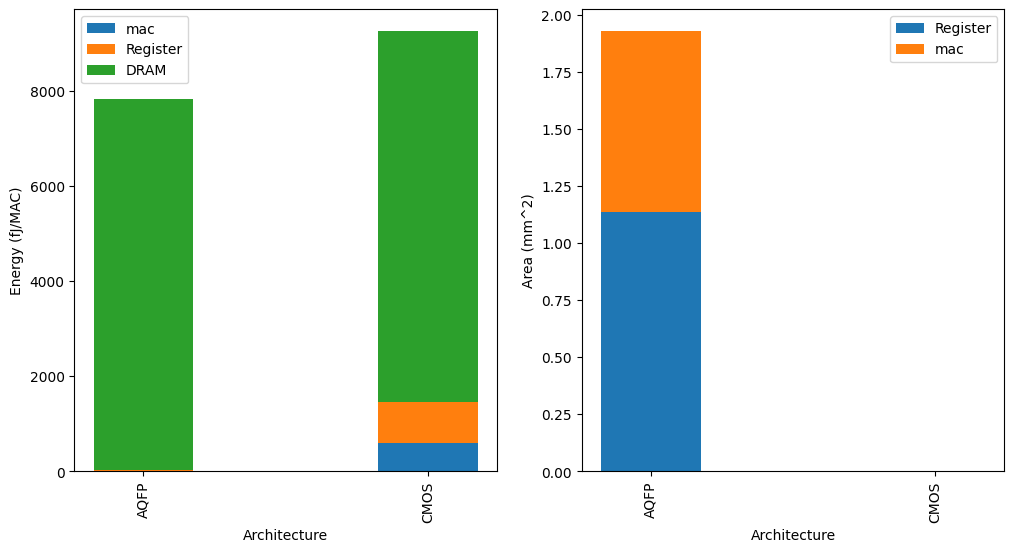

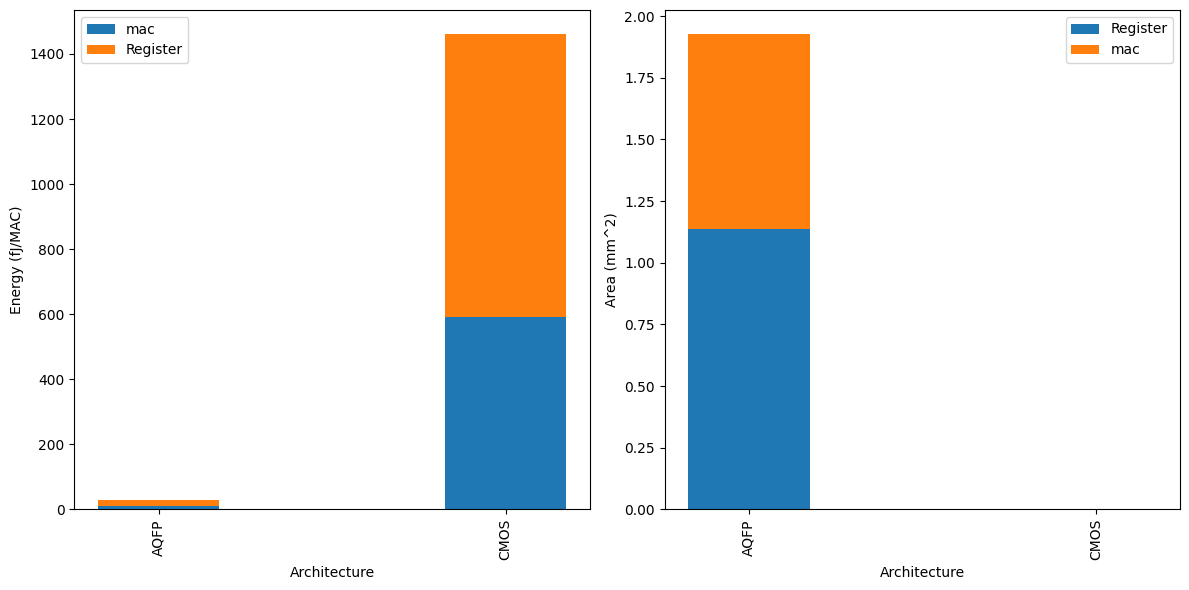

In [18]:
import sys
import os

# Add the workspace root directory to Python path
workspace_root = '/home/workspace'
if workspace_root not in sys.path:
    sys.path.append(workspace_root)

# Import the plotting functions
from scripts.plots import *

def plot_with_dram_on_off(results):
    for include_dram in [True, False]:
        # Create subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        # Display an energy breakdown stacked bar graph
        energy = {k: v.per_compute('per_component_energy') * 1e15 for k, v in results.items()}
        if not include_dram:
            energy = {k: {kk: vv for kk, vv in v.items() if kk != 'DRAM'} for k, v in energy.items()}
        bar_stacked(energy, xlabel='Architecture', ylabel='Energy (fJ/MAC)', ax=ax1, missing_ok=True, print_csv=True)
        area = {k: v.per_component_area * 1e6 for k, v in results.items()}
        bar_stacked(area, xlabel='Architecture', ylabel='Area (mm^2)', ax=ax2, missing_ok=True, print_csv=True)
    # Adjust layout
    plt.tight_layout()
    plt.show()
    
plot_with_dram_on_off(results)


Architecture vs. Energy (fJ/MAC)
Label,AQFP,CMOS
mac,10.999999999999998,592.0
Register,1069.9999999999998,2220.0
DRAM,974.0000000000001,974.0000000000001

Architecture vs. Area (mm^2)
Label,AQFP,CMOS
Register,72.74496,0.027105125
mac,0.79196,0.0002465025

Architecture vs. Energy (fJ/MAC)
Label,AQFP,CMOS
mac,10.999999999999998,592.0
Register,1069.9999999999998,2220.0

Architecture vs. Area (mm^2)
Label,AQFP,CMOS
Register,72.74496,0.027105125
mac,0.79196,0.0002465025


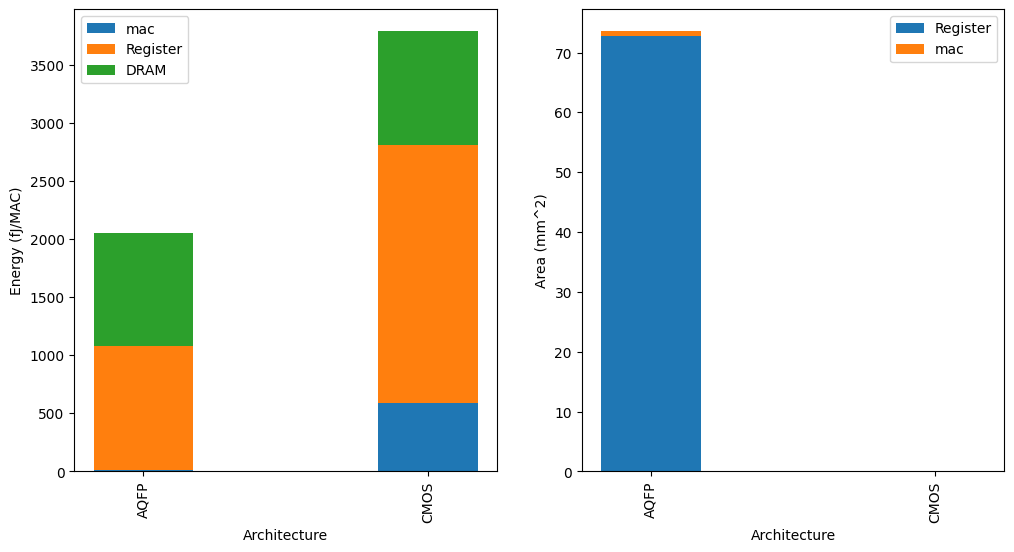

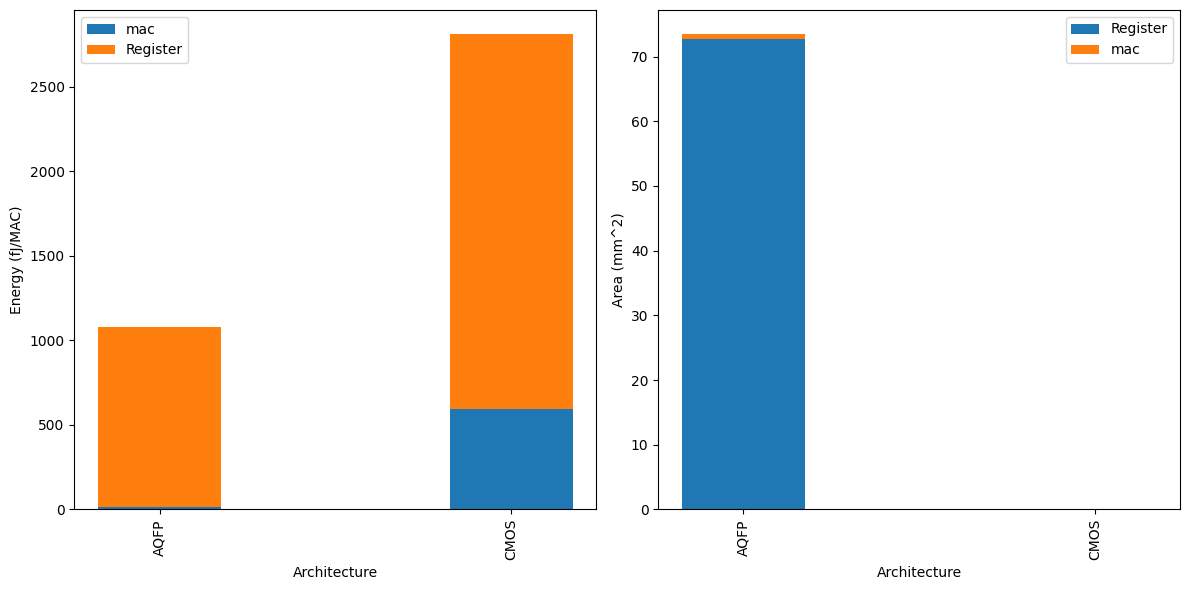

In [7]:
kwargs['reg_depth'] = 1024
kwargs['reg_width'] = 128

if os.path.exists('output'):
    os.system('rm -rf output')

results = Parallel(n_jobs=-1)(delayed(generate_result)(sub_architecture, BATCH_SIZE, **kwargs) for sub_architecture in SUB_ARCHITECTURES)
results = {sub_architecture: result for sub_architecture, result in zip(SUB_ARCHITECTURES, results)}
plot_with_dram_on_off(results)


Architecture vs. Energy (fJ/MAC)
Label,AQFP,CMOS
mac,71.49999999999999,592.0
Register,54.1,319.0
DRAM,974.0000000000001,974.0000000000001

Architecture vs. Area (mm^2)
Label,AQFP,CMOS
Register,72.74496,0.027105125
inter_mac_array_spatial,1e-06,1e-06
mac,101.37088,0.03155232

Architecture vs. Energy (fJ/MAC)
Label,AQFP,CMOS
mac,71.49999999999999,592.0
Register,54.1,319.0

Architecture vs. Area (mm^2)
Label,AQFP,CMOS
Register,72.74496,0.027105125
inter_mac_array_spatial,1e-06,1e-06
mac,101.37088,0.03155232


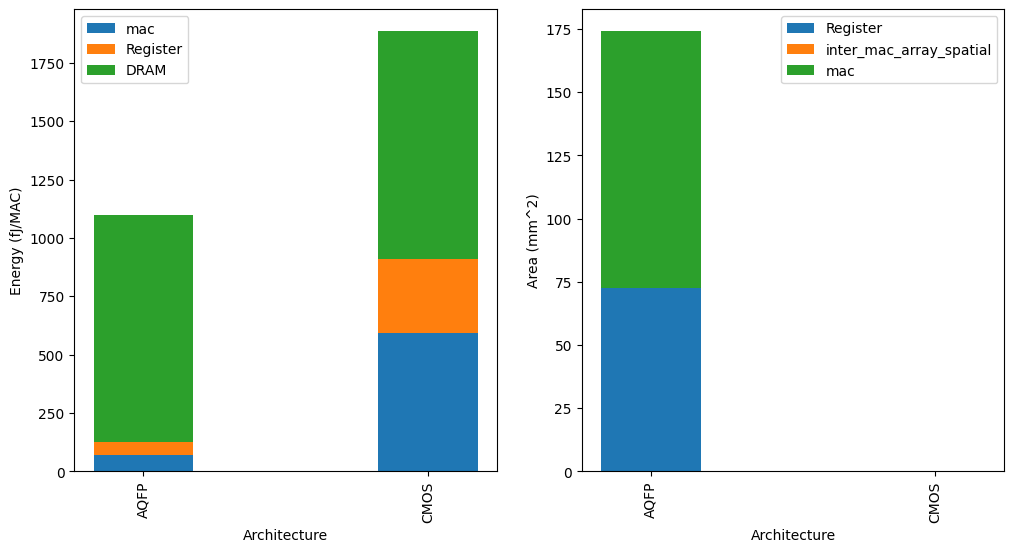

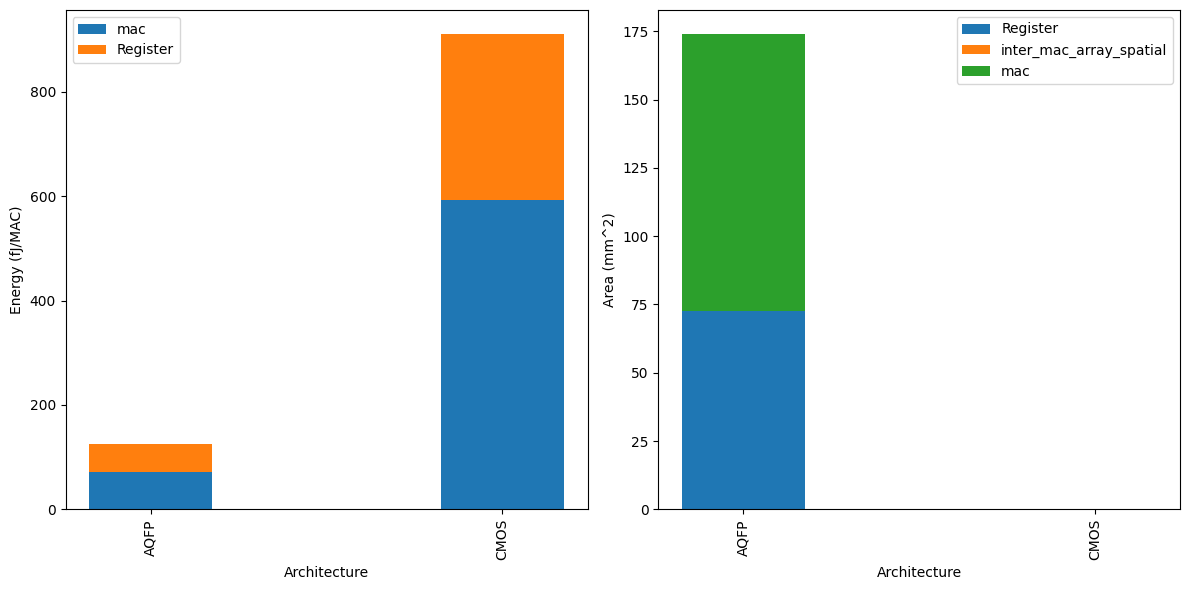

In [8]:
kwargs['n_macs'] = 128

if os.path.exists('output'):
    os.system('rm -rf output')

results = Parallel(n_jobs=-1)(delayed(generate_result)(sub_architecture, BATCH_SIZE, **kwargs) for sub_architecture in SUB_ARCHITECTURES)
results = {sub_architecture: result for sub_architecture, result in zip(SUB_ARCHITECTURES, results)}
plot_with_dram_on_off(results)


Architecture vs. Energy (fJ/MAC)
Label,example_cmos,example_aqfp
mac,748.9999999999999,10.7
Register,319.0,8.330000000000002
DRAM,974.0000000000001,1.11

Architecture vs. Area (mm^2)
Label,example_cmos,example_aqfp
inter_mac_array_spatial,1e-06,1e-06
Register,0.0271629,72.74499999999999
mac,0.054345984,101.37088
DRAM,0,297.271

Architecture vs. Energy (fJ/MAC)
Label,example_cmos,example_aqfp
mac,748.9999999999999,10.7
Register,319.0,8.330000000000002

Architecture vs. Area (mm^2)
Label,example_cmos,example_aqfp
inter_mac_array_spatial,1e-06,1e-06
Register,0.0271629,72.74499999999999
mac,0.054345984,101.37088
DRAM,0,297.271


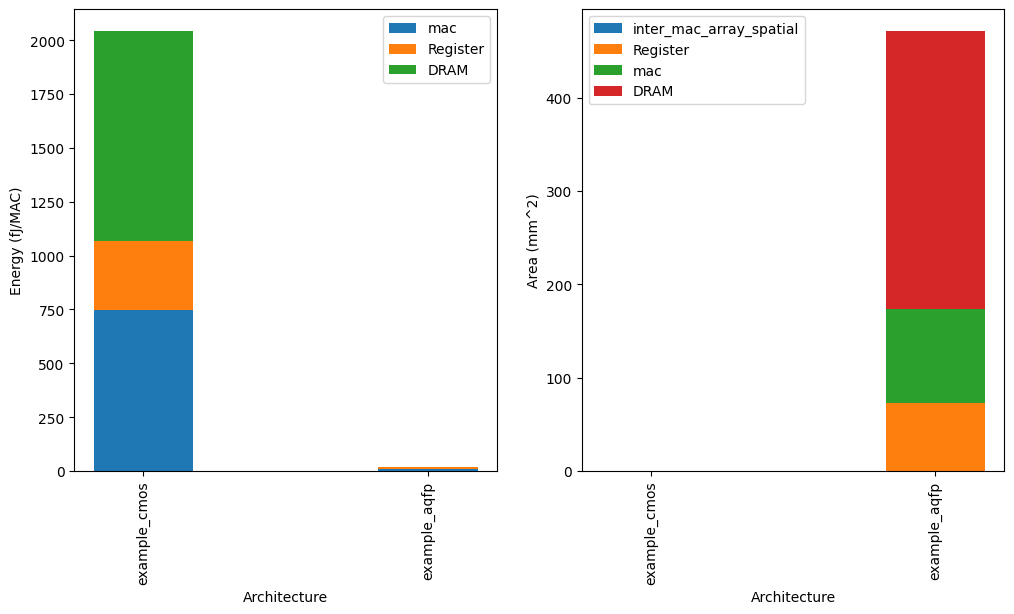

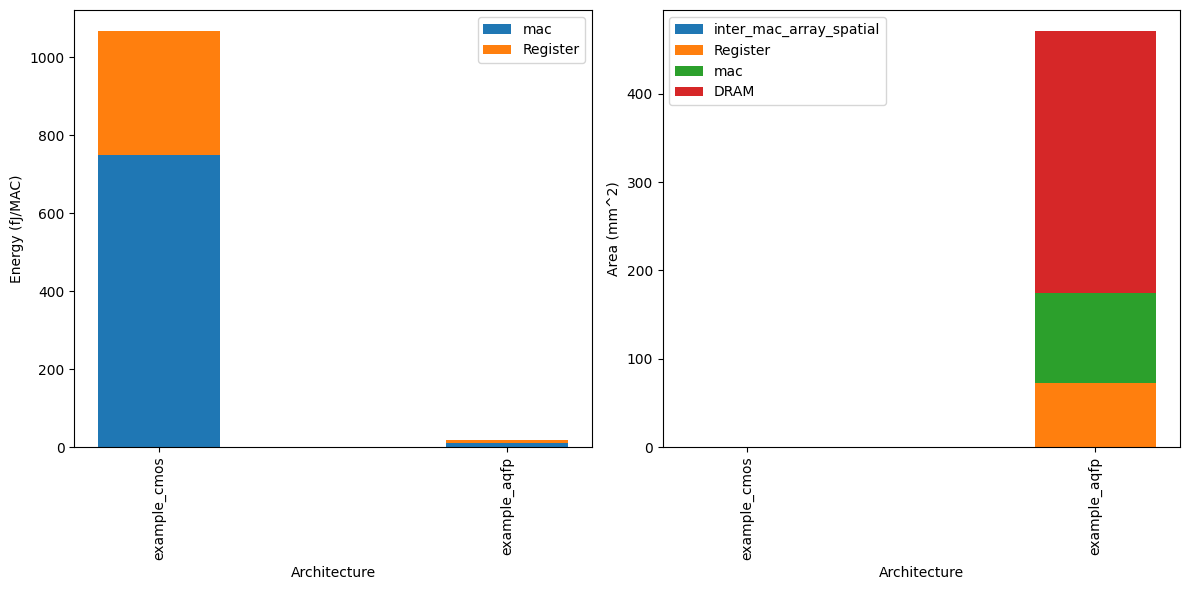

In [6]:
kwargs['aqfp_dram_type'] = "dlm_ptl"

if os.path.exists('output'):
    os.system('rm -rf output')

results = Parallel(n_jobs=-1)(delayed(generate_result)(sub_architecture, BATCH_SIZE, **kwargs) for sub_architecture in SUB_ARCHITECTURES)
results = {sub_architecture: result for sub_architecture, result in zip(SUB_ARCHITECTURES, results)}
plot_with_dram_on_off(results)

# Alternative Import Methods

If the current import doesn't work, here are other approaches you can try:

## Method 1: Using getcwd() (works if you run notebook from workspace root)
```python
import sys
import os
# Add current working directory to path (assuming you run from /home/workspace)
sys.path.append(os.getcwd())
from scripts.plots import *
```

## Method 2: Using __file__ equivalent for notebooks
```python
import sys
import os
from pathlib import Path

# Get the notebook's directory and go up one level
notebook_dir = Path().resolve()
workspace_root = notebook_dir.parent
sys.path.append(str(workspace_root))
from scripts.plots import *
```

## Method 3: Direct import with importlib
```python
import importlib.util
import sys

spec = importlib.util.spec_from_file_location("plots", "/home/workspace/scripts/plots.py")
plots = importlib.util.module_from_spec(spec)
sys.modules["plots"] = plots
spec.loader.exec_module(plots)

# Now use: plots.bar_stacked() instead of bar_stacked()
```
